In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams ['figure.figsize'] = 15,5
sns.set_style('darkgrid')

In [3]:
data= pd.read_csv('/Users/muskanoad/Downloads/IRIS.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data Cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


All the data is cleaned since there are no missing values

# Data Visualization

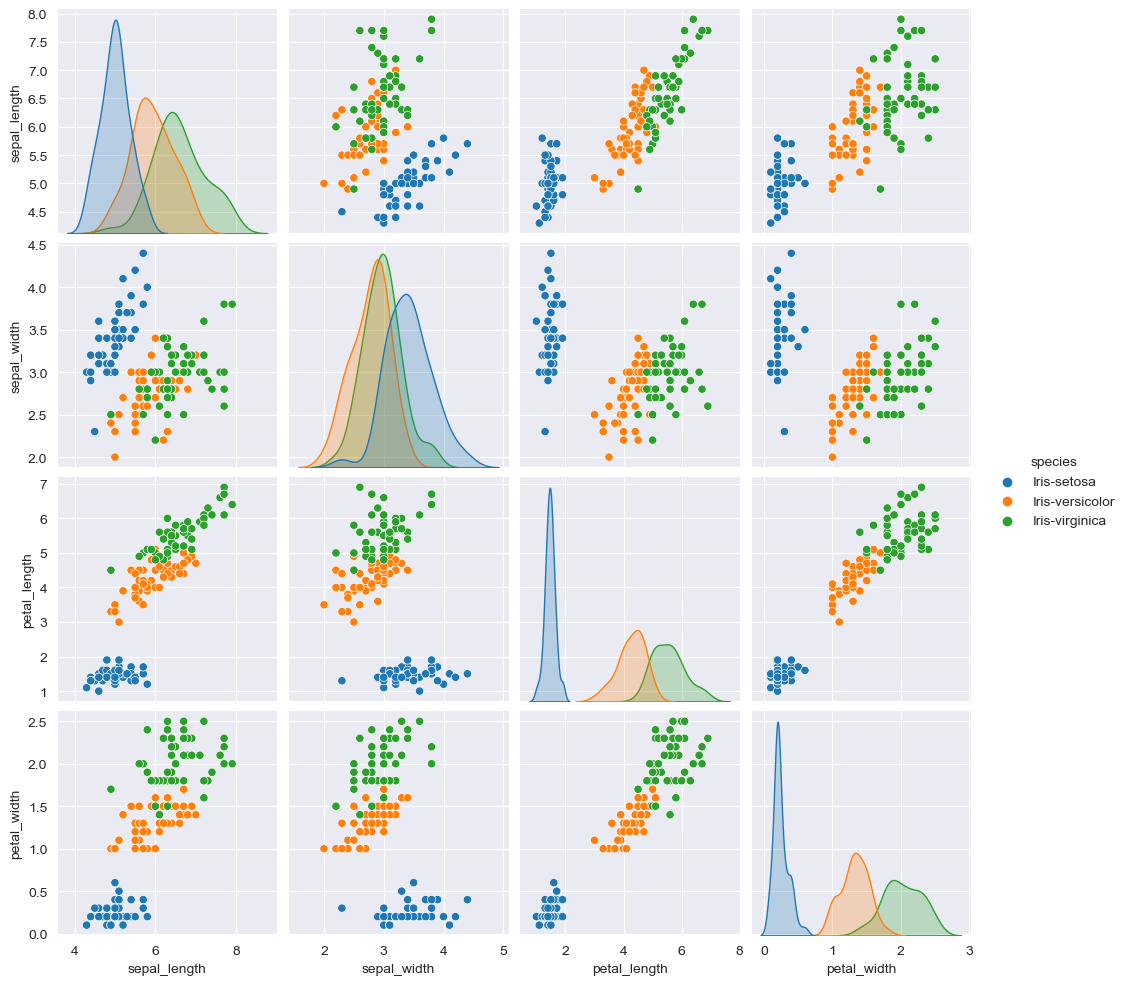

In [6]:
sns.pairplot(data=data,hue='species')
plt.show()

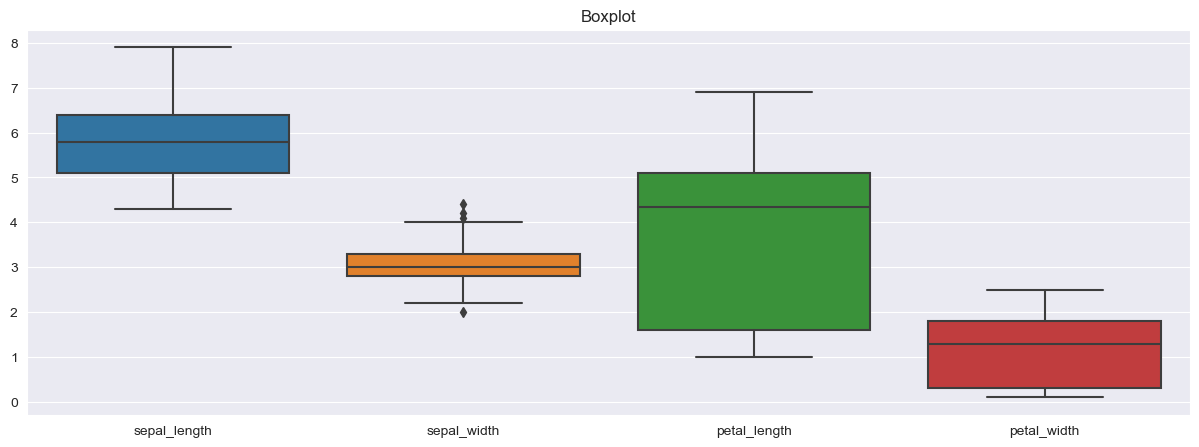

In [12]:
sns.boxplot(data=data)
plt.title('Boxplot')
plt.show()

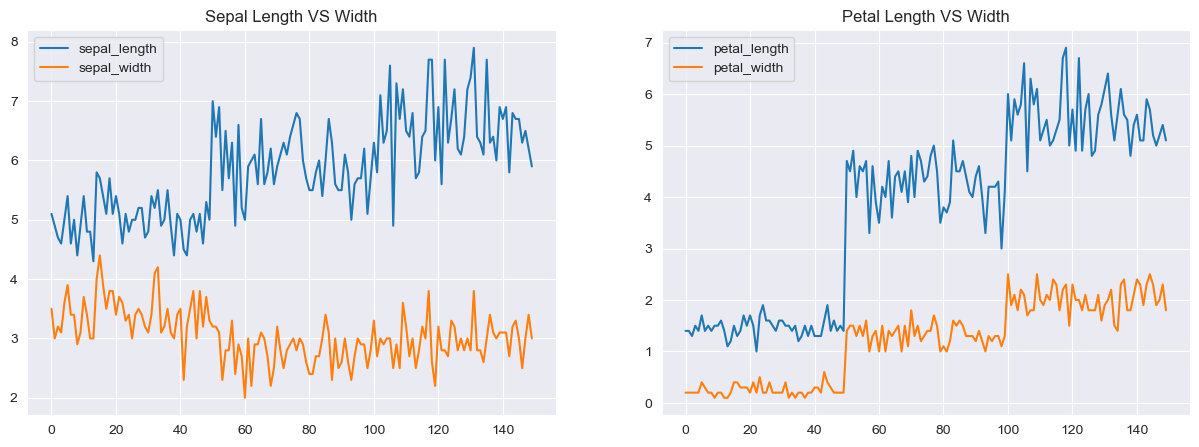

In [19]:
fig,ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot(data['sepal_length'])
ax[0].plot(data['sepal_width'])
ax[0].set_title('Sepal Length VS Width')
ax[0].legend(['sepal_length','sepal_width'])
ax[1].plot(data['petal_length'])
ax[1].plot(data['petal_width'])
ax[1].set_title('Petal Length VS Width')
ax[1].legend(['petal_length','petal_width'])
plt.show()


# Data Preprocessing

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [25]:
data['species'] = LabelEncoder().fit_transform(data['species'])
X = data.drop(['species'],axis=1)
y = data['species']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Model Training (KNN)

In [35]:
k = 3  # Choose the number of neighbors
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

# Model Evaluation

Accuracy: 1.0
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



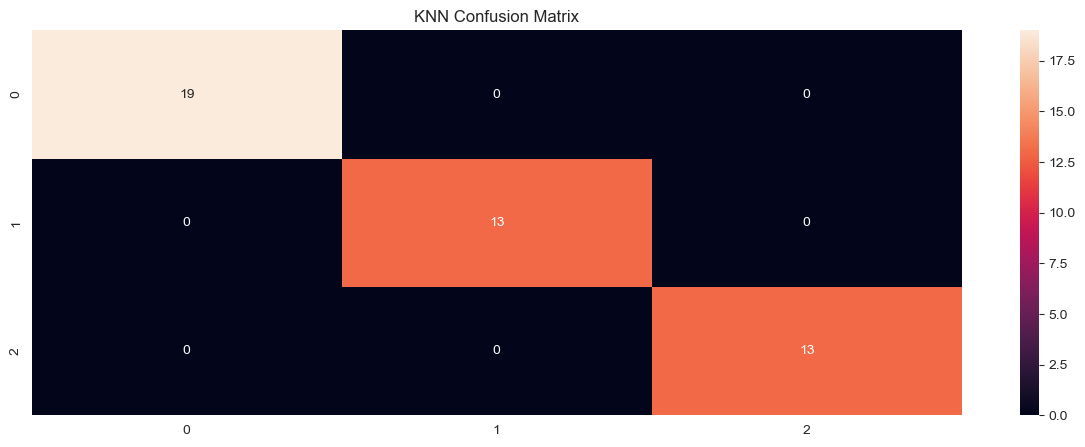

In [46]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Classification Report:\n{classification_rep}")
ax =sns.heatmap(confusion, annot=True)
ax.set_title("KNN Confusion Matrix")
plt.show()

Our KN Classifier performed well let's try another model.

In [41]:
model_svm = SVC(kernel='linear', C=1)  
model_svm.fit(X_train, y_train)


SVC(C=1, kernel='linear')

In [42]:
y_pred_svm = model_svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
confusion_svm = confusion_matrix(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

print("Support Vector Machine (SVM) Model:")
print(f"Accuracy: {accuracy_svm}")
print(f"Confusion Matrix:\n{confusion_svm}")
print(f"Classification Report:\n{classification_rep_svm}")


Support Vector Machine (SVM) Model:
Accuracy: 0.9777777777777777
Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



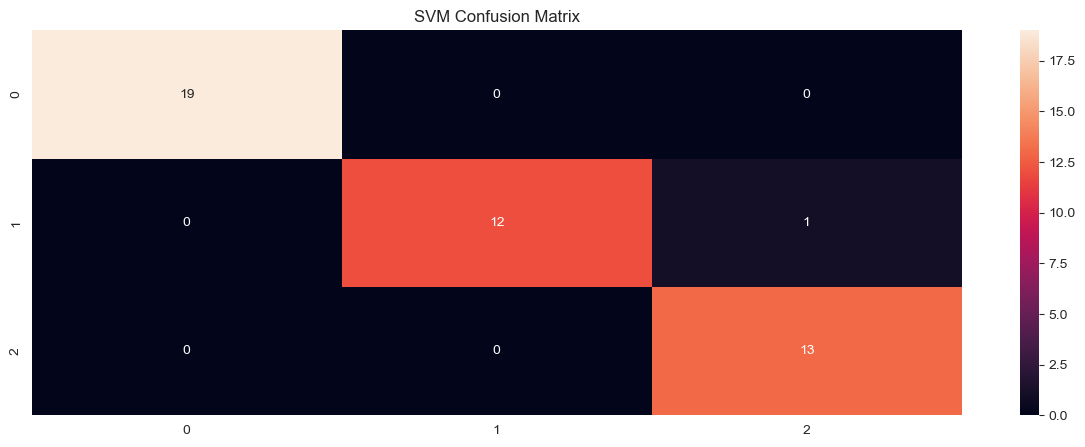

In [45]:
ax =sns.heatmap(confusion_svm, annot=True)
ax.set_title("SVM Confusion Matrix")
plt.show()